In [ ]:
import random
from random import choices
from random import randint
import math
import pandas_datareader as datareader
import pandas as pds
import matplotlib.pyplot as plot
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
import tensorflow as tf
import time
from sklearn.metrics import mean_squared_error

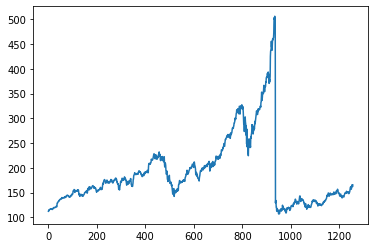

In [ ]:
database = datareader.get_data_tiingo('AAPL', api_key='7938af734e4e99dd4b7a8321cdb47fb699d2f9dc')
database.to_csv('AAPL.csv')
database = pds.read_csv('AAPL.csv')
plot.plot(database.reset_index()['close'])

actual = database[1000:1030]
actual = actual.reset_index()['close']

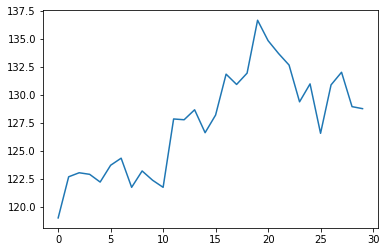

In [ ]:
plot.plot(actual)

In [ ]:
database = database[0:1000]
database1 = database.reset_index()['close']

In [ ]:
database

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-08 00:00:00+00:00,112.12,112.4300,110.60,110.86,27068316,26.380961,26.453902,26.023317,26.084493,108273264,0.0,1.0
1,AAPL,2016-12-09 00:00:00+00:00,113.95,114.7000,112.31,112.31,34402627,26.811546,26.988015,26.425667,26.425667,137610508,0.0,1.0
2,AAPL,2016-12-12 00:00:00+00:00,113.30,115.0000,112.49,113.29,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
3,AAPL,2016-12-13 00:00:00+00:00,115.19,115.9200,113.75,113.84,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
4,AAPL,2016-12-14 00:00:00+00:00,115.19,116.2000,114.98,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AAPL,2020-11-20 00:00:00+00:00,117.34,118.7700,117.29,118.64,73604287,116.621334,118.042576,116.571640,117.913372,73604287,0.0,1.0
996,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.75,117.18,127959318,113.152709,116.899818,113.053321,116.462314,127959318,0.0,1.0
997,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,114.464624,115.140459,111.900426,113.212341,113226248,0.0,1.0
998,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,115.319357,116.034947,114.464624,114.842297,76499234,0.0,1.0


In [ ]:
database1.shape

(1000,)

In [ ]:
database1

0      112.12
1      113.95
2      113.30
3      115.19
4      115.19
        ...  
995    117.34
996    113.85
997    115.17
998    116.03
999    116.59
Name: close, Length: 1000, dtype: float64

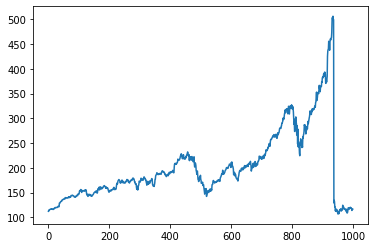

In [ ]:
plot.plot(database1)

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
database1 = scale.fit_transform(np.array(database1).reshape(-1,1))
database1

array([[1.32247965e-02],
       [1.78083907e-02],
       [1.61803381e-02],
       [2.09142142e-02],
       [2.09142142e-02],
       [2.24921728e-02],
       [2.28678773e-02],
       [2.45460238e-02],
       [2.53224796e-02],
       [2.55979962e-02],
       [2.36693801e-02],
       [2.42454602e-02],
       [2.60989355e-02],
       [2.48465874e-02],
       [2.47714465e-02],
       [2.24921728e-02],
       [2.33187226e-02],
       [2.29931121e-02],
       [2.44708829e-02],
       [2.77269881e-02],
       [3.04320601e-02],
       [3.07326237e-02],
       [3.23356293e-02],
       [3.10832812e-02],
       [3.05572949e-02],
       [3.29618034e-02],
       [3.29367564e-02],
       [3.24107702e-02],
       [3.29618034e-02],
       [3.31621791e-02],
       [3.28866625e-02],
       [3.76706324e-02],
       [3.78209142e-02],
       [3.78459612e-02],
       [3.70444584e-02],
       [3.63431434e-02],
       [5.48778961e-02],
       [5.43268629e-02],
       [5.57044458e-02],
       [5.87351284e-02],


In [ ]:
database1.shape

(1000, 1)

In [ ]:
trainSize = int(len(database1)*0.65)
testSize = len(database1) - trainSize
trainingData, validData = database1[0:trainSize,:], database1[trainSize:len(database1),:1]

In [ ]:
len(trainingData), len(validData)

(650, 350)

In [ ]:
trainingData

array([[0.0132248 ],
       [0.01780839],
       [0.01618034],
       [0.02091421],
       [0.02091421],
       [0.02249217],
       [0.02286788],
       [0.02454602],
       [0.02532248],
       [0.025598  ],
       [0.02366938],
       [0.02424546],
       [0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.071

In [ ]:
def createDataset(_database, timeStep=1):
	X_data, Y_data = [], []
	for i in range(len(_database)-timeStep-1):
		point = _database[i:(i+timeStep), 0]    
		X_data.append(point)
		Y_data.append(_database[i + timeStep, 0])
	return numpy.array(X_data), numpy.array(Y_data)

GA functions

In [ ]:
def fitness(model):
  timeStep = model.layers[1].output.shape[1]
  #timeStep = 30
  xInput=validData[len(validData)-timeStep:].reshape(1,-1)

  tempInput=list(xInput)
  tempInput=tempInput[0].tolist()
  listOutput=[]
  steps=timeStep
  i=0
  while(i<30):
    if(len(tempInput)>timeStep):
      #print(tempInput)
      xInput=np.array(tempInput[1:])

      xInput=xInput.reshape(1,-1)
      xInput = xInput.reshape((1, steps, 1))
      #print(xInput)
      Y_hat = model.predict(xInput, verbose=0)

      tempInput.extend(Y_hat[0].tolist())
      tempInput=tempInput[1:]
      #print(tempInput)
      listOutput.extend(Y_hat.tolist())
      i=i+1
    else:
      xInput = xInput.reshape((1, steps,1))
      Y_hat = model.predict(xInput, verbose=0)
      #print(Y_hat[0])
      tempInput.extend(Y_hat[0].tolist())
      print(len(tempInput))
      listOutput.extend(Y_hat.tolist())
      i=i+1

  val = math.sqrt(mean_squared_error(scale.inverse_transform(listOutput),actual))
 
  return val

def generate_population(size: int, LSTM_sells_lower_bound: float, LSTM_sells_upper_bound: float, 
                                   window_size_lower_bound: float, window_size__upper_bound: float):
  pop = []
  
  i = 0
  while i<size:
    lstm = round(random.uniform(LSTM_sells_lower_bound, LSTM_sells_upper_bound))
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(round(random.uniform(window_size_lower_bound, window_size__upper_bound)),1)))     #(100,1) == X_train.shape - window
    model.add(LSTM(lstm,return_sequences=True))
    model.add(LSTM(lstm))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    pop.append(model)
    i +=1

  return pop

def rank_population(population):
  ranked_pop = []

  for p in population:
    _f = fitness(p)
    ranked_pop.append((_f, p))
  
  #ranked_pop.sort()
  #ranked_pop.reverse()

  return ranked_pop

def select_pair(ranked_population):
  pair = []

  while True:
    pair.append(random.choices(ranked_population[0:round(len(ranked_population))], weights = (25, 20, 15, 15, 10, 7, 5, 3)))     #20, 15, 10, 10, 10, 7, 7, 6, 6, 5, 3, 1
    pair.append(random.choices(ranked_population[0:round(len(ranked_population))], weights = (25, 20, 15, 15, 10, 7, 5, 3)))      #25, 20, 15, 15, 10, 7, 5, 3

    if pair[0][0] != pair[1][0]:
      break

    pair.clear()

  return pair

def genbin(n):
    i=0
    gen_bit = []
    while i < n:
      bit = str(randint(0,1))
      gen_bit.append(bit)
      i +=1
    gen_bit = ''.join(gen_bit)
    return gen_bit

def cross_over(pair):
  window_1 = str(bin(pair[0][0][1].layers[1].output.shape[1]))
  lstm_1 = str(bin(pair[0][0][1].layers[1].output.shape[2]))    

  window_2 = str(bin(pair[1][0][1].layers[1].output.shape[1]))
  lstm_2 = str(bin(pair[1][0][1].layers[1].output.shape[2]))

  window_1 = window_1[2:]
  lstm_1 = lstm_1[2:]

  window_2 = window_2[2:]
  lstm_2 = lstm_2[2:]

  if len(window_1) != len(window_2):
    diff = abs(len(window_1) - len(window_2))
    i=0
    if len(window_1) < len(window_2):
     while len(window_1) < len(window_2):
       window_1 = '0' + window_1
       i += 1
  if  len(window_2) < len(window_1):
    while len(window_2) < len(window_1):
      window_2 = '0' + window_2
      i += 1

  if len(lstm_1) != len(lstm_2):
    diff = abs(len(lstm_1) - len(lstm_2))
    i=0
    if len(lstm_1) < len(lstm_2):
     while len(lstm_1) < len(lstm_2):
       lstm_1 = '0' + lstm_1
       i += 1
  if  len(lstm_2) < len(lstm_1):
    while len(lstm_2) < len(lstm_1):
      lstm_2 = '0' + lstm_2
      i += 1

  window_p = random.randint(1,len(window_1)-1)
  lstm_p = random.randint(1,len(lstm_1)-1)

  print("window_p: ", window_p, "    lstm_p: ", lstm_p)

  window_child_1 = window_1[:window_p] + window_2[window_p:]
  window_child_2 = window_2[:window_p] + window_1[window_p:]

  lstm_child_1 = lstm_1[:lstm_p] + lstm_2[lstm_p:]
  lstm_child_2 = lstm_2[:lstm_p] + lstm_1[lstm_p:]

  while int(window_child_1, 2) == 0 or int(window_child_2, 2) == 0 or int(lstm_child_1, 2) == 0 or int(lstm_child_2, 2) == 0:
    if int(window_child_1, 2) == 0:
      length = randint(2, 8)
      window_child_1 = genbin(length)

    if int(window_child_2, 2) == 0:
      length = randint(2, 8)
      window_child_2 = genbin(length)

    if int(lstm_child_1, 2) == 0:
      length = randint(2, 8)
      lstm_child_1 = genbin(length)

    if int(lstm_child_2, 2) == 0:
      length = randint(2, 8)
      lstm_child_2 = genbin(length)

  pair = []
  
  model1=Sequential()
  model1.add(LSTM(50,return_sequences=True,input_shape=(int(window_child_1, 2),1)))     
  model1.add(LSTM(int(lstm_child_1, 2), return_sequences=True))
  model1.add(LSTM(int(lstm_child_1, 2)))
  model1.add(Dense(1))
  model1.compile(loss='mean_squared_error',optimizer='adam')
  pair.append(model1)

  model2=Sequential()
  model2.add(LSTM(50,return_sequences=True,input_shape=(int(window_child_2, 2),1)))     
  model2.add(LSTM(int(lstm_child_2, 2), return_sequences=True))
  model2.add(LSTM(int(lstm_child_2, 2)))
  model2.add(Dense(1))
  model2.compile(loss='mean_squared_error',optimizer='adam')
  pair.append(model2)

  print("1: ", window_1, "  ", lstm_1)
  print("2: ", window_2, "  ", lstm_2)
  print("child_1: ", window_child_1, "  ", lstm_child_1)
  print("child_2: ", window_child_2, "  ", lstm_child_2)

  return pair

def mutation(new_population):
  percent_of_population = random.uniform(0, 0.8)
  num_of_population = round(percent_of_population * len(new_population))
  
  i = 0
  while i < num_of_population:
    mutated_one = random.choice(new_population)
    
    window = str(bin(mutated_one.layers[1].output.shape[1]))
    lstm = str(bin(mutated_one.layers[1].output.shape[2]))
    print('window: ', window, "   lstm: ", lstm)
    window = window[2:]
    lstm = lstm[2:]
    
    new_population.remove(mutated_one)

    mutation_num = randint(1, 3)
    j=0

    while j < mutation_num:
      mutated_gene = randint(0, 1)
      
      if mutated_gene == 0:
        mutated_chromosome = randint(0, len(window)-1)
        window = list(window)
        window[mutated_chromosome] = str(int(window[mutated_chromosome]) ^ 1)
        window = ''.join(window)
        if int(window, 2) == 0:
          window = str(bin(mutated_one.layers[1].output.shape[1]))
          window = window[2:]


      else:
        mutated_chromosome = randint(0, len(lstm)-1)
        lstm = list(lstm)
        lstm[mutated_chromosome] = str(int(lstm[mutated_chromosome]) ^ 1)
        lstm = ''.join(lstm)
        if int(lstm, 2) == 0:
          lstm = str(bin(mutated_one.layers[1].output.shape[2]))
          lstm = lstm[2:]

      j += 1
    
    print('mut_window: ', window, "   mut_lstm: ", lstm)
    
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(int(window, 2),1)))     
    model.add(LSTM(int(lstm, 2), return_sequences=True))
    model.add(LSTM(int(lstm, 2)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
      
    new_population.append(model)
    i += 1

  return new_population


Full Genetic Algorithm

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

start = time.time()

pop = generate_population(8, 10, 50, 10, 50)

for model in pop:
  XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
  XValid, YValid = createDataset(validData, model.input_shape[1])
  XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
  XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

  model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=20,batch_size=64,verbose=1)
  print("val_loss: ", model.history.history['val_loss'][len(model.history.history['val_loss'])-1])

ranked_pop = rank_population(pop)
ranked_pop.sort()

min_val_loss = []
min_val_loss.append(ranked_pop[0][0])

N = 30
i = 2

while i < N:
    
  print("RANKED_POP")
  for p in ranked_pop:
    print(p[0], "    window: ", p[1].layers[1].output.shape[1], "    lstm_cells: ", p[1].layers[1].output.shape[2])    #"    vall_loss: ", p[1].history.history['val_loss'][len(model.history.history['val_loss'])-1]

  min_val_loss.append(ranked_pop[0][0])

  pair = []
  children = []
  k = 0

  while  k < round(len(pop)/2):
    pair = select_pair(ranked_pop)
    children += cross_over(pair)
    k += 2

  print("CHILDREN")
  for p in children:
    print("window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])
    
  mutated_pop = mutation(children)
  print("MUTATED")
  for p in mutated_pop:
    print("window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])

  #new_pop = []
  ranked_pop = ranked_pop[0:round(len(ranked_pop)/2)]

  #for model in ranked_pop[0:round(len(ranked_pop)/2)]:
    #new_pop.append(model[1])

  for model in mutated_pop:
    XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
    XValid, YValid = createDataset(validData, model.input_shape[1])
    XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
    XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

    model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=20,batch_size=64,verbose=1)
    print("val_loss: ", model.history.history['val_loss'][len(model.history.history['val_loss'])-1])

  ranked_mutated_pop = rank_population(mutated_pop)    
  
  ranked_pop = ranked_pop + ranked_mutated_pop
  ranked_pop.sort()

  #pop.clear()
  #for p in ranked_pop:
    #pop.append(p)
  #print("************************************************************************")
  #print("NEW POP")
  #for p in pop:
    #print("    window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])     #"    vall_loss: ", p.history.history['val_loss'][len(p.history.history['val_loss'])-1],

  print("~~~~~~~~~ GENERATION ", i, " COMPLETED ~~~~~~~~~~")

  i += 1

end = time.time()
print("TOTAL TIME SPENT: ", end - start)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
10/10 [==============================] - 3s 293ms/step - loss: 0.0110 - val_loss: 0.0346
Epoch 2/20
10/10 [==============================] - 3s 271ms/step - loss: 0.0028 - val_loss: 0.0689
Epoch 3/20
10/10 [==============================] - 3s 282ms/step - loss: 0.0019 - val_loss: 0.0448
Epoch 4/20
10/10 [==============================] - 3s 299ms/step - loss: 0.0013 - val_loss: 0.0465
Epoch 5/20
10/10 [==============================] - 3s 276ms/step - loss: 0.0010 - val_loss: 0.0363
Epoch 6/20
10/10 [==============================] - 3s 274ms/step - loss: 7.7820e-04 - val_loss: 0.0320
Epoch 7/20
10/10 [==============================] - 3s 290ms/step - loss: 6.2155e-04 - val_loss: 0.0261
Epoch 8/20
10/10 [==============================] - 3s 276ms/step - loss: 5.7877e-04 - val_loss: 0.0248
Epoch 9/20
10/10 [==============================] - 3s 283ms/step - loss: 5.9011e-04 - val_loss: 0.0247
Epoch 10/20
10/10 [==============================] - 3s 274ms/step - loss: 5.7785e-0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


19


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


45


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


49


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


47
TOTAL TIME SPENT:  585.3279869556427


In [ ]:
for p in ranked_pop:
  print(p[0], "    window: ", p[1].layers[1].output.shape[1], "    lstm_cells: ", p[1].layers[1].output.shape[2]) 

2.841205651816309     window:  18     lstm_cells:  15
4.28411400894622     window:  46     lstm_cells:  31
4.501038621987398     window:  48     lstm_cells:  11
4.574577944005702     window:  38     lstm_cells:  18
4.742554664383441     window:  19     lstm_cells:  16
5.545733149599061     window:  49     lstm_cells:  23
5.940934765690041     window:  38     lstm_cells:  19
6.953310647521283     window:  44     lstm_cells:  11


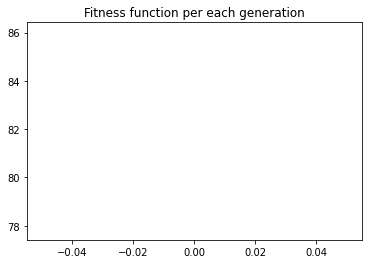

In [ ]:
epochs_num = range(0, 29)
plot.title('Fitness function per each generation')
plot.plot(epochs_num, min_val_loss)

In [ ]:
model = ranked_pop[0][1]
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 18, 50)            10400     
                                                                 
 lstm_31 (LSTM)              (None, 18, 15)            3960      
                                                                 
 lstm_32 (LSTM)              (None, 15)                1860      
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 16,236
Trainable params: 16,236
Non-trainable params: 0
_________________________________________________________________


In [ ]:
XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
XValid, YValid = createDataset(validData, model.input_shape[1])
XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

In [ ]:
PredictTraining=model.predict(XTraining)
PredictValid=model.predict(XValid)

PredictTraining=scale.inverse_transform(PredictTraining)
PredictValid=scale.inverse_transform(PredictValid)

math.sqrt(mean_squared_error(YTraining,PredictTraining))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


173.18328146798868

In [ ]:
math.sqrt(mean_squared_error(YValid,PredictValid))

267.3370765430131

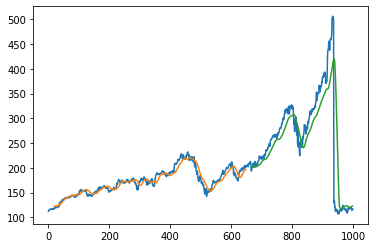

In [ ]:
delay = model.layers[1].output.shape[1]
Plot_training_prediction = numpy.empty_like(database1)
Plot_training_prediction[:, :] = np.nan
Plot_training_prediction[delay:len(PredictTraining)+delay, :] = PredictTraining
# shift test predictions for plotting
Plot_valid_prediction = numpy.empty_like(database1)
Plot_valid_prediction[:, :] = numpy.nan
Plot_valid_prediction[len(PredictTraining)+(delay*2)+1:len(database1)-1, :] = PredictValid
# plot baseline and predictions
plot.plot(scale.inverse_transform(database1))
plot.plot(Plot_training_prediction)
plot.plot(Plot_valid_prediction)
plot.show()

In [ ]:
print(len(validData))
timestep = model.layers[1].output.shape[1]

350


In [ ]:
xInput=validData[len(validData)-timestep:].reshape(1,-1)
xInput.shape

(1, 18)

In [ ]:
tempInput=list(xInput)
tempInput=tempInput[0].tolist()

In [ ]:
print(tempInput)
print(len(tempInput))

[0.009016906700062555, 0.020313087038196564, 0.0305322479649342, 0.02968065122103941, 0.023744520976831496, 0.022867877269880987, 0.03168440826549773, 0.030983093299937314, 0.031108328115216022, 0.03371321227301183, 0.031433938634940484, 0.02802755165936127, 0.02955541640576076, 0.02629931120851592, 0.01755792110206633, 0.02086412022542261, 0.02301815904821536, 0.02442078897933625]
18


In [ ]:
from numpy import array

listOutput=[]
steps=timestep
i=0
while(i<30):
    
    if(len(tempInput)>timestep):
        #print(tempInput)
        xInput=np.array(tempInput[1:])
        print("{} day input {}".format(i,xInput))
        xInput=xInput.reshape(1,-1)
        xInput = xInput.reshape((1, steps, 1))
        #print(xInput)
        Y_hat = model.predict(xInput, verbose=0)
        print("{} day output {}".format(i,Y_hat))
        tempInput.extend(Y_hat[0].tolist())
        tempInput=tempInput[1:]
        #print(tempInput)
        listOutput.extend(Y_hat.tolist())
        i=i+1
    else:
        xInput = xInput.reshape((1, steps,1))
        Y_hat = model.predict(xInput, verbose=0)
        print(Y_hat[0])
        tempInput.extend(Y_hat[0].tolist())
        print(len(tempInput))
        listOutput.extend(Y_hat.tolist())
        i=i+1
    

print(listOutput)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.0409363]
19
1 day input [0.02031309 0.03053225 0.02968065 0.02374452 0.02286788 0.03168441
 0.03098309 0.03110833 0.03371321 0.03143394 0.02802755 0.02955542
 0.02629931 0.01755792 0.02086412 0.02301816 0.02442079 0.0409363 ]
1 day output [[0.04137468]]
2 day input [0.03053225 0.02968065 0.02374452 0.02286788 0.03168441 0.03098309
 0.03110833 0.03371321 0.03143394 0.02802755 0.02955542 0.02629931
 0.01755792 0.02086412 0.02301816 0.02442079 0.0409363  0.04137468]
2 day output [[0.04153284]]
3 day input [0.02968065 0.02374452 0.02286788 0.03168441 0.03098309 0.03110833
 0.03371321 0.03143394 0.02802755 0.02955542 0.02629931 0.01755792
 0.02086412 0.02301816 0.02442079 0.0409363  0.04137468 0.04153284]
3 day output [[0.04155231]]
4 day input [0.02374452 0.02286788 0.03168441 0.03098309 0.03110833 0.03371321
 0.03143394 0.02802755 0.02955542 0.02629931 0.01755792 0.02086412
 0.02301816 0.02442079 0.0409363  0.04137468 0.04153284 0.04155231]
4 day output [[0.04181015]]
5 day input [0.02

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
len(database1)

1000

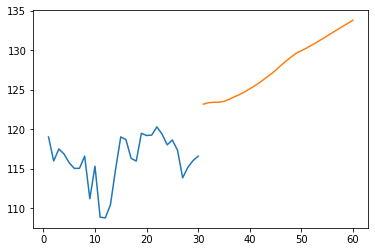

In [ ]:
plot.plot(day_new,scale.inverse_transform(database1[970:]))
plot.plot(day_pred,scale.inverse_transform(listOutput))

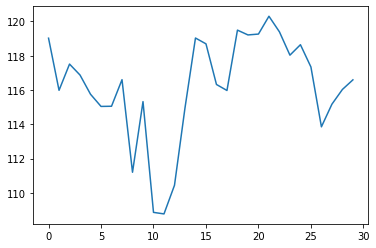

In [ ]:
plot.plot(scale.inverse_transform(database1[970:]))

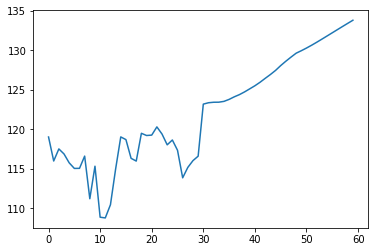

In [ ]:
database3=database1.tolist()
database3.extend(listOutput)
plot.plot(scale.inverse_transform(database3[970:]))

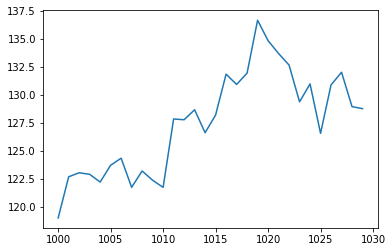

In [ ]:
a =  pds.read_csv('AAPL.csv')
a = a.reset_index()['close']
plot.plot(a[1000:1030])

In [ ]:
math.sqrt(mean_squared_error(scale.inverse_transform(listOutput),a[1000:1030]))

2.841205651816309

In [ ]:
XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
XValid, YValid = createDataset(validData, model.input_shape[1])
XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)
model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=30,batch_size=64,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/30
10/10 [==============================] - 2s 199ms/step - loss: 4.1327e-04 - val_loss: 0.0197
Epoch 2/30
10/10 [==============================] - 2s 188ms/step - loss: 4.0402e-04 - val_loss: 0.0193
Epoch 3/30
10/10 [==============================] - 2s 160ms/step - loss: 3.9054e-04 - val_loss: 0.0191
Epoch 4/30
10/10 [==============================] - 2s 158ms/step - loss: 3.8997e-04 - val_loss: 0.0188
Epoch 5/30
10/10 [==============================] - 2s 160ms/step - loss: 3.9119e-04 - val_loss: 0.0187
Epoch 6/30
10/10 [==============================] - 2s 157ms/step - loss: 3.8588e-04 - val_loss: 0.0188
Epoch 7/30
10/10 [==============================] - 2s 193ms/step - loss: 3.9118e-04 - val_loss: 0.0185
Epoch 8/30
10/10 [==============================] - 2s 191ms/step - loss: 3.8295e-04 - val_loss: 0.0181
Epoch 9/30
10/10 [==============================] - 2s 190ms/step - loss: 3.7046e-04 - val_loss: 0.0180
Epoch 10/30
10/10 [==============================] - 2s 155ms/st

In [ ]:
model1=Sequential()
model1 = model
model1.set_weights(model.get_weights()) 